# Content analysis of subreddit r/tDCS
### Tutorials
Scraping reddit: https://towardsdatascience.com/scraping-reddit-data-1c0af3040768
LDA topic modelling: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0, https://www.tutorialspoint.com/gensim/gensim_documents_and_lda_model.htm

In [1]:
import pandas as pd
import os

In [5]:
#!pip install praw

In [6]:
import praw

In [7]:
reddit = praw.Reddit(client_id='GmEsU35_2gtrf2HN8Glu_Q', client_secret='deiVjBGNpg1fwMkWFic6Rea-MePlYQ', user_agent='my user agent', check_for_async = False)

In [8]:
# get 10 hot posts from the MachineLearning subreddit
for submission in reddit.subreddit("tDCS").hot(limit=10):
  print(submission.title)

PSA: Sticky electrodes and skin burns
Do people use these for ADHD?
Help on which devise I should look into
Possible damage to the brain
So I was looking to buy the brain drive and came across a website selling it 123 dollars
What's the perfect metaphor for tDCS?
Enduring effects of a single tACS session
The Utility of HD-tDCS as Add on Treatment for Negative Symptoms in Schizophrenia: A Case Report [2021]
Study: TDCS for disgust reduction- can anyone identify the montage?
Cortical suppression for greater altruism. Anybody have an angle on this?


In [78]:
import pandas as pd
posts = []
tdcs_subreddit = reddit.subreddit('tDCS')
for post in tdcs_subreddit.new(limit=500):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
print(posts['created'])

0      1.637935e+09
1      1.637909e+09
2      1.637856e+09
3      1.637809e+09
4      1.637789e+09
           ...     
495    1.590765e+09
496    1.589831e+09
497    1.589596e+09
498    1.589437e+09
499    1.589426e+09
Name: created, Length: 500, dtype: float64


In [7]:
print(posts.iloc[1]['body'])

My first and only tDCS experience with +F3 -Fp2 @ 1 mA ([https://totaltdcs.com/electrode-placement-montage-list/depression-and-anxiety/](https://totaltdcs.com/electrode-placement-montage-list/depression-and-anxiety/)) was pretty scary (depersonalization issues, strong symptoms of depression for around 12-48 hours).

My neurologist was fascinated by the results, because it gives insights what's supposed to be wrong and recommended the same montage with switched polarity which would be -F3 +Fp2.

Has anybody tried switching polarities with this or any other popular montage? If so, what were your experiences?


In [85]:
import datetime
posts['datetime'] = posts['created']

for post in range(0, len(posts['datetime'])):
  time = posts.iloc[post]['datetime']
  posts.at[post,'datetime'] = datetime.datetime.fromtimestamp(time)
posts = posts[26:386]
print(len(posts))

360


In [86]:
posts.to_csv(r'oneyear_posts.csv', index = False)

### Data cleaning

In [2]:
# Importing modules
papers = pd.read_csv('oneyear_posts.csv')
# Print head
papers.head()

,title,score,id,subreddit,url,num_comments,body,created,datetime
0,which tDCS devices are the best ones right now?,17,qjnajr,tDCS,https://www.reddit.com/r/tDCS/comments/qjnajr/...,17,Hey. I’m currently treated for treatment resis...,1.635678e+09,2021-10-31 07:05:40
1,Protocols for better auditory processing for m...,10,qimlw2,tDCS,https://www.reddit.com/r/tDCS/comments/qimlw2/...,1,Any musicians out here have protocols or have ...,1.635542e+09,2021-10-29 17:16:40
2,Hi! Any recommendations for a cheap t/dcs mach...,4,qgm2mt,tDCS,https://www.reddit.com/r/tDCS/comments/qgm2mt/...,6,Need it for a research experiment.,1.635300e+09,2021-10-26 22:08:03
3,Learn how Pulsed Electromagnetic Field (PEMF) ...,6,qg53bj,tDCS,https://medium.com/@PEMFTherapy/stroke-rehabil...,0,NaN,1.635251e+09,2021-10-26 08:15:13
4,Is there a montage that would help someone wit...,11,qdjege,tDCS,https://www.reddit.com/r/tDCS/comments/qdjege/...,11,Is there a montage that would help someone wit...,1.634917e+09,2021-10-22 11:30:43


In [3]:
# Remove the columns
papers = papers.drop(columns=['score', 'id', 'subreddit', 'url'], axis=1)
# Print out the first rows of papers
papers.head()

,title,num_comments,body,created,datetime
0,which tDCS devices are the best ones right now?,17,Hey. I’m currently treated for treatment resis...,1.635678e+09,2021-10-31 07:05:40
1,Protocols for better auditory processing for m...,1,Any musicians out here have protocols or have ...,1.635542e+09,2021-10-29 17:16:40
2,Hi! Any recommendations for a cheap t/dcs mach...,6,Need it for a research experiment.,1.635300e+09,2021-10-26 22:08:03
3,Learn how Pulsed Electromagnetic Field (PEMF) ...,0,NaN,1.635251e+09,2021-10-26 08:15:13
4,Is there a montage that would help someone wit...,11,Is there a montage that would help someone wit...,1.634917e+09,2021-10-22 11:30:43


In [4]:
papers['body_processed'] = papers['body'].astype(str)
papers['title_processed'] = papers['title'].astype(str)

In [5]:
# Load the regular expression library
import re

# Remove punctuation
papers['body_processed'] = papers['body_processed'].map(lambda x: re.sub('[,\.!?\’]', '', x))

# Convert the titles to lowercase
papers['body_processed'] = papers['body_processed'].str.lower()

# Print out the first rows of papers
papers['body_processed'].head()

# Remove punctuation
papers['title_processed'] = papers['title_processed'].map(lambda x: re.sub('[,\.!?\’]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].str.lower()


In [6]:
papers['body_processed'].head()

0    hey im currently treated for treatment resista...
1    any musicians out here have protocols or have ...
2                    need it for a research experiment
3                                                  nan
4    is there a montage that would help someone wit...
Name: body_processed, dtype: object

In [7]:
papers_body = papers.dropna()
papers_body = papers_body['body_processed']

In [8]:
len(papers_body)

317

### Word Clouds

In [ ]:
#!pip install wordcloud

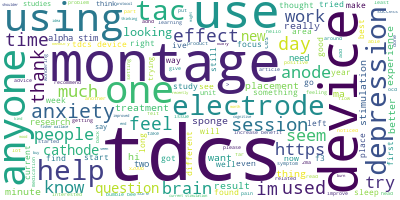

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers_body.values) + list(papers['title_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


### Topic modelling

In [21]:
#!pip install gensim

In [99]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.body_processed.values.tolist() + papers.title_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['hey', 'im', 'currently', 'treated', 'treatment', 'resistant', 'depression', 'social', 'anxiety', 'parnate', 'maoi', 'antidepressant', 'results', 'great', 'far', 'feel', 'like', 'im', 'remission', 'research', 'tdcs', 'would', 'like', 'try', 'luck', 'adjunct', 'medication', 'going', 'higher', 'doses']


In [100]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [118]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"tdcs" + 0.008*"montage" + 0.007*"im" + 0.006*"device" + '
  '0.006*"would" + 0.006*"used" + 0.006*"get" + 0.006*"anyone" + '
  '0.006*"stimulation" + 0.006*"help"'),
 (1,
  '0.023*"tdcs" + 0.012*"montage" + 0.010*"depression" + 0.008*"using" + '
  '0.007*"like" + 0.006*"feel" + 0.006*"ive" + 0.006*"know" + 0.006*"tacs" + '
  '0.005*"https"'),
 (2,
  '0.021*"tdcs" + 0.011*"device" + 0.008*"sleep" + 0.007*"stim" + '
  '0.007*"https" + 0.007*"anxiety" + 0.007*"like" + 0.007*"alpha" + 0.006*"im" '
  '+ 0.005*"tacs"'),
 (3,
  '0.031*"tdcs" + 0.012*"im" + 0.010*"anyone" + 0.010*"montage" + '
  '0.008*"brain" + 0.007*"like" + 0.007*"device" + 0.006*"new" + 0.006*"using" '
  '+ 0.005*"stimulation"'),
 (4,
  '0.015*"tdcs" + 0.010*"brain" + 0.008*"im" + 0.006*"like" + 0.006*"would" + '
  '0.006*"effects" + 0.005*"https" + 0.004*"feel" + 0.004*"stimulation" + '
  '0.004*"device"'),
 (5,
  '0.010*"device" + 0.009*"im" + 0.009*"tdcs" + 0.008*"https" + 0.008*"using" '
  '+ 0.006*"brai

In [119]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(
   model=lda_model, texts=texts, dictionary=id2word, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3549953710299282


In [120]:
coher = {10: .35, 15: .35, 18: .372, 20: .376, 22: .35, 25: .32}

In [56]:
def dominant_topics(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(
                   pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True
                )
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [58]:
df_topic_sents_keywords = dominant_topics(ldamodel=lda_model, corpus=corpus, texts=(papers['body_processed']+papers_body))
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [60]:
df_dominant_topic.tail()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
195,195,4.0,0.90,"tdcs, research, anyone, used, day, depression,...",NaN
196,196,8.0,0.82,"anyone, tdcs, long, term, cognitive, montage, ...",NaN
197,197,8.0,0.82,"anyone, tdcs, long, term, cognitive, montage, ...",NaN
198,198,0.0,0.90,"tdcs, montage, depression, like, right, anxiet...",NaN
199,199,4.0,0.70,"tdcs, research, anyone, used, day, depression,...",NaN


In [64]:
#!pip install pyldavis --user
#!pip install graphlab --user

ERROR: Could not find a version that satisfies the requirement graphlab (from versions: none)
ERROR: No matching distribution found for graphlab


In [63]:
import pyLDAvis
import pickle
import pyLDAvis.gensim_models
import os
#import pyLDAvis.graphlab


C:\Users\megan\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [64]:
absolute_path = os.path.abspath('scraping_reddit.ipynb')
print("Full path: " + absolute_path)
print("Directory Path: " + os.path.dirname(absolute_path))

Full path: C:\Users\megan\OneDrive - Emory University\neuroethics\reddit\scraping_reddit.ipynb
Directory Path: C:\Users\megan\OneDrive - Emory University\neuroethics\reddit


In [146]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = ('C:/Users/megan/OneDrive - Emory University/neuroethics/reddit/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\megan\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18    -0.364112 -0.240562       1        1  37.197654
13    -0.250473  0.310975       2        1  14.559799
19    -0.048384 -0.008219       3        1   7.659778
4     -0.117070  0.037348       4        1   6.852216
9      0.032048 -0.021052       5        1   4.826494
17     0.052327 -0.000363       6        1   4.426244
7      0.058992 -0.008683       7        1   4.344696
3      0.005260  0.014470       8        1   3.893062
6      0.059747 -0.010668       9        1   3.009815
5      0.053779  0.005537      10        1   2.805923
0      0.037884  0.006788      11        1   2.070636
15     0.058746 -0.007234      12        1   1.905720
8      0.057562 -0.008244      13        1   1.501836
16     0.057287 -0.008997      14        1   1.416892
10     0.055132 -0.009668      15        1   0.937832
12     0.054054 -0.008441      16        1   0.883939
14     0.048091 -0.016714      17        1   0.816427
11     0.051987 -0.008822      18        1   0.369601
1      0.048672 -0.008741      19        1   0.286014
2      0.048471 -0.008707      20        1   0.235422, topic_info=                        Term        Freq       Total Category  logprob  \
41                      tdcs  569.000000  569.000000  Default  30.0000   
8                 depression  146.000000  146.000000  Default  29.0000   
75                   montage  147.000000  147.000000  Default  28.0000   
399                   anyone  122.000000  122.000000  Default  27.0000   
73                     https  104.000000  104.000000  Default  26.0000   
...                      ...         ...         ...      ...      ...   
3673                  pulsed    0.009318    1.061518  Topic20  -8.3384   
2964                  easily    0.009318    1.061521  Topic20  -8.3384   
1861                   learn    0.009318    1.061550  Topic20  -8.3384   
2991  behavioral_flexibility    0.009318    1.061543  Topic20  -8.3384   
3597         electromagnetic    0.009318    1.061582  Topic20  -8.3384   

      loglift  
41     30.000  
8      29.000  
75     28.000  
399    27.000  
73     26.000  
...       ...  
3673    1.316  
2964    1.316  
1861    1.316  
2991    1.316  
3597    1.316  

[758 rows x 6 columns], token_table=      Topic      Freq                  Term
term                                       
719       4  0.806853                    ac
1335      8  0.901798  accelerated_learning
1149      6  0.820222                across
919      18  0.727866            activadose
796       6  0.849426                active
...     ...       ...                   ...
710      11  0.713205  wwwyoutubecom_watchv
1216     10  0.747869                   yes
1392      6  0.774096                  youd
1217      7  0.784896                 youre
1451      7  0.844681               zapping

[666 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 14, 20, 5, 10, 18, 8, 4, 7, 6, 1, 16, 9, 17, 11, 13, 15, 12, 2, 3])

In [136]:
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [137]:
def remove_stopwords(texts):
   return [[word for word in simple_preprocess(str(doc))
if word not in stop_words] for doc in texts]
def make_bigrams(texts):
   return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
   return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   texts_out = []
   for sent in texts:
     doc = nlp(" ".join(sent))
     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
   return texts_out

In [138]:
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)

In [139]:
id2word = corpora.Dictionary(data_words_bigrams)
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

In [145]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:4]] 
#it will print the words with their frequencies.
lda_model = gensim.models.ldamodel.LdaModel(
   corpus=corpus, id2word=id2word, num_topics=20, random_state=100, 
   update_every=1, chunksize=100, passes=20, alpha='auto', per_word_topics=True
)

In [144]:
lda_model_2 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20)